In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('futuristic_city_traffic.csv')

In [3]:
dataset.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1048575 non-null  object 
 1   Vehicle Type           1048575 non-null  object 
 2   Weather                1048575 non-null  object 
 3   Economic Condition     1048575 non-null  object 
 4   Day Of Week            1048575 non-null  object 
 5   Hour Of Day            1048575 non-null  int64  
 6   Speed                  1048575 non-null  float64
 7   Is Peak Hour           1048575 non-null  int64  
 8   Random Event Occurred  1048575 non-null  int64  
 9   Energy Consumption     1048575 non-null  float64
 10  Traffic Density        1048575 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 88.0+ MB


In [6]:
dataset.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.150741e+01,5.993168e+01,1.547329e-01,4.999356e-02,4.945187e+01,2.771250e-01
std,6.918308e+00,2.663434e+01,3.616500e-01,2.179318e-01,2.527329e+01,2.191737e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.751590e+01,0.000000e+00,0.000000e+00,2.925070e+01,1.059000e-01
50%,1.200000e+01,5.845500e+01,0.000000e+00,0.000000e+00,4.576990e+01,2.186000e-01
75%,1.700000e+01,8.053695e+01,0.000000e+00,0.000000e+00,6.589690e+01,3.961000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


# Density of traffic based on the city

In [23]:
traffic_city = dataset.groupby('City')['Traffic Density'].mean().reset_index()
traffic_city

,City,Traffic Density
0,AquaCity,0.447362
1,Ecoopolis,0.192730
2,MetropolisX,0.462254
3,Neuroburg,0.074394
4,SolarisVille,0.290536
5,TechHaven,0.195914


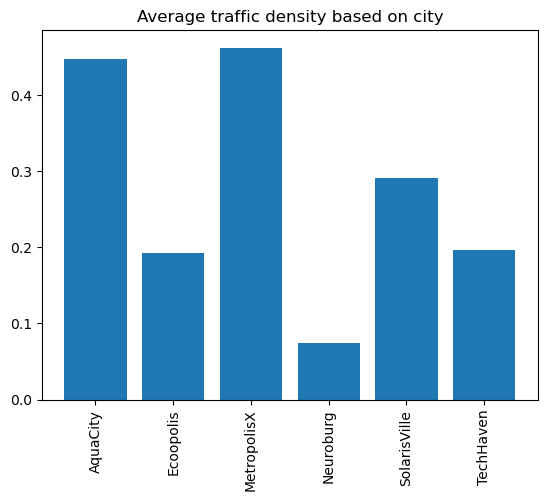

In [44]:
fig = plt.figure(dpi=100)
plt.bar(data=traffic_city,x=traffic_city['City'],height=traffic_city['Traffic Density'])
plt.title(label= 'Average traffic density based on city')
plt.xticks(rotation=90)
plt.show()

# Density of traffic based on the city


In [41]:
traffic_weather = dataset.groupby('Weather')['Traffic Density'].mean().reset_index()
traffic_weather

,Weather,Traffic Density
0,Clear,0.296128
1,Electromagnetic Storm,0.290848
2,Rainy,0.267787
3,Snowy,0.268023
4,Solar Flare,0.262880


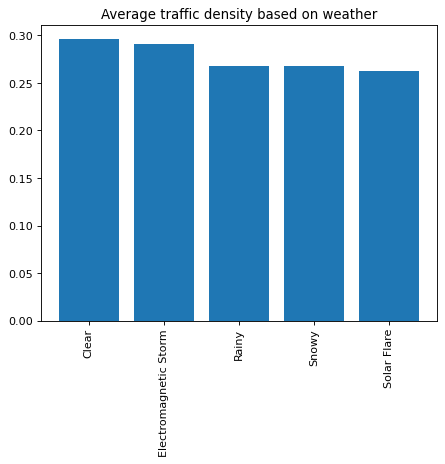

In [43]:
fig = plt.figure(dpi=80)
plt.bar(data=traffic_weather,x=traffic_weather['Weather'],height=traffic_weather['Traffic Density'])
plt.title(label= 'Average traffic density based on weather')
plt.xticks(rotation=90)
plt.show()

# Ammount of vehicle types from each category

In [50]:
cars = dataset['Vehicle Type'].value_counts().reset_index()
cars

,Vehicle Type,count
0,Autonomous Vehicle,651424
1,Drone,262182
2,Flying Car,67701
3,Car,67268


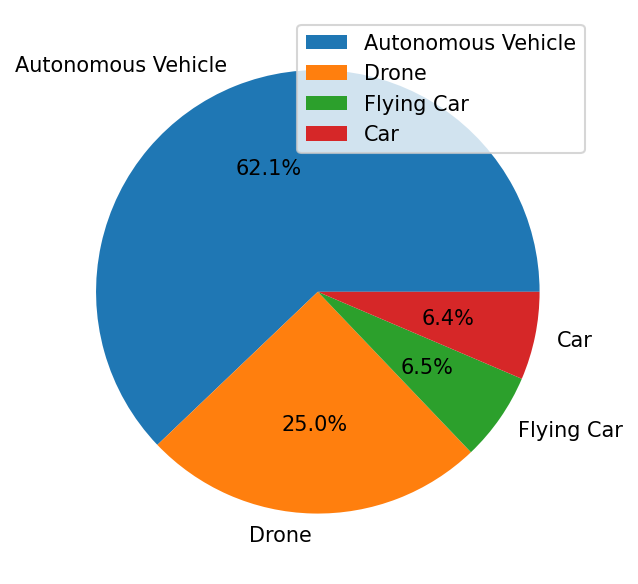

In [66]:
fig = plt.figure(dpi=150)
labels = [x for x in cars['Vehicle Type']]
plt.pie(labels = labels,x=cars['count'],autopct='%1.1f%%')
plt.legend()

# Does Traffic density increase of decrease energy consumption?

In [74]:
dataset['Energy Consumption'].corr(dataset['Traffic Density'])

0.01584834966727215

In [79]:
energyconsumption_density= dataset.groupby('Energy Consumption')['Traffic Density'].mean().sort_values(ascending=False).reset_index()
energyconsumption_density

,Energy Consumption,Traffic Density
0,102.1249,3.3776
1,52.7132,3.0981
2,40.7681,2.7313
3,19.3050,2.5698
4,43.6543,2.5011
...,...,...
615103,98.1513,0.0066
615104,77.8290,0.0066
615105,54.1401,0.0066
615106,89.7701,0.0063


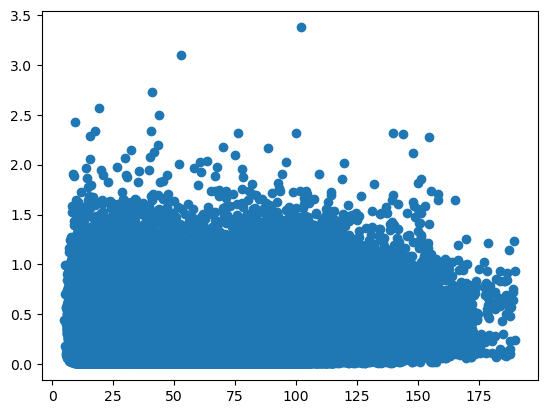

In [80]:
plt.scatter(data=energyconsumption_density,x='Energy Consumption',y='Traffic Density')

we can clearly see that thats not a case 

# Traffic Density on every hour of the week

In [83]:
dataset['Day Of Week'].unique()

array(['Sunday', 'Wednesday', 'Thursday', 'Saturday', 'Monday', 'Friday',
       'Tuesday'], dtype=object)

In [95]:
dataset['hour/day'] = dataset['Day Of Week'] + " / " + dataset['Hour Of Day'].astype(str)

In [99]:
every_hour_density = dataset.groupby('hour/day')['Traffic Density'].mean().sort_values(ascending=False)
every_hour_density

hour/day
Friday / 8        0.305019
Wednesday / 8     0.297634
Saturday / 12     0.297614
Friday / 7        0.297477
Monday / 7        0.293569
                    ...   
Thursday / 15     0.259880
Tuesday / 13      0.259598
Tuesday / 16      0.258205
Tuesday / 15      0.257685
Wednesday / 16    0.256271
Name: Traffic Density, Length: 168, dtype: float64

# Average speed of every vehicle type

In [102]:
dataset.groupby('Vehicle Type')['Speed'].mean()

Vehicle Type
Autonomous Vehicle    59.964752
Car                   59.852511
Drone                 60.609965
Flying Car            57.065397
Name: Speed, dtype: float64

# Does a car consume more energy when moving faster?

In [106]:
dataset['Energy Consumption'].corr(dataset['Speed'])

0.8402546249082197

In [112]:
energy_car=dataset.groupby('Speed')['Energy Consumption'].mean().sort_values(ascending=False).reset_index()

Text(0, 0.5, 'Energy Consumption')

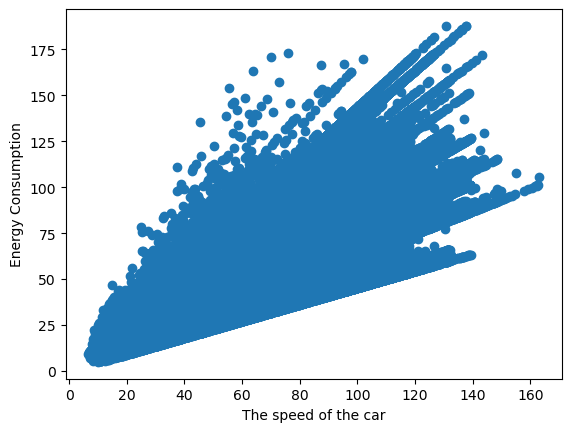

In [115]:
plt.scatter(x='Speed',y='Energy Consumption',data=energy_car)
plt.xlabel(xlabel='The speed of the car')
plt.ylabel(ylabel='Energy Consumption')